# Is there a correlation between results in different subjects?

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

import file_processing_EIT
import file_processing_NMT

Function for visualisation matrix.

In [59]:
def show_matrix(df_subjects, title):
    correlation_matrix = df_subjects.corr()

    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='winter', linecolor='black') # cmap='ocean'
    plt.title(title)
    plt.tight_layout()
    plt.show()

    high_corr = correlation_matrix.stack()
    high_corr = high_corr[(high_corr < 1.0) & (high_corr >= 0.7)].sort_values(ascending=False)
    print(high_corr)

### EIT

In [60]:
def select_col_eit(df):
    grades_only = file_processing_EIT.grades_only
    df = df[['OUTID'] + grades_only]
    return df, df[grades_only]

In [61]:
eit = file_processing_EIT.EIT
eit, eit_subjects = select_col_eit(eit)

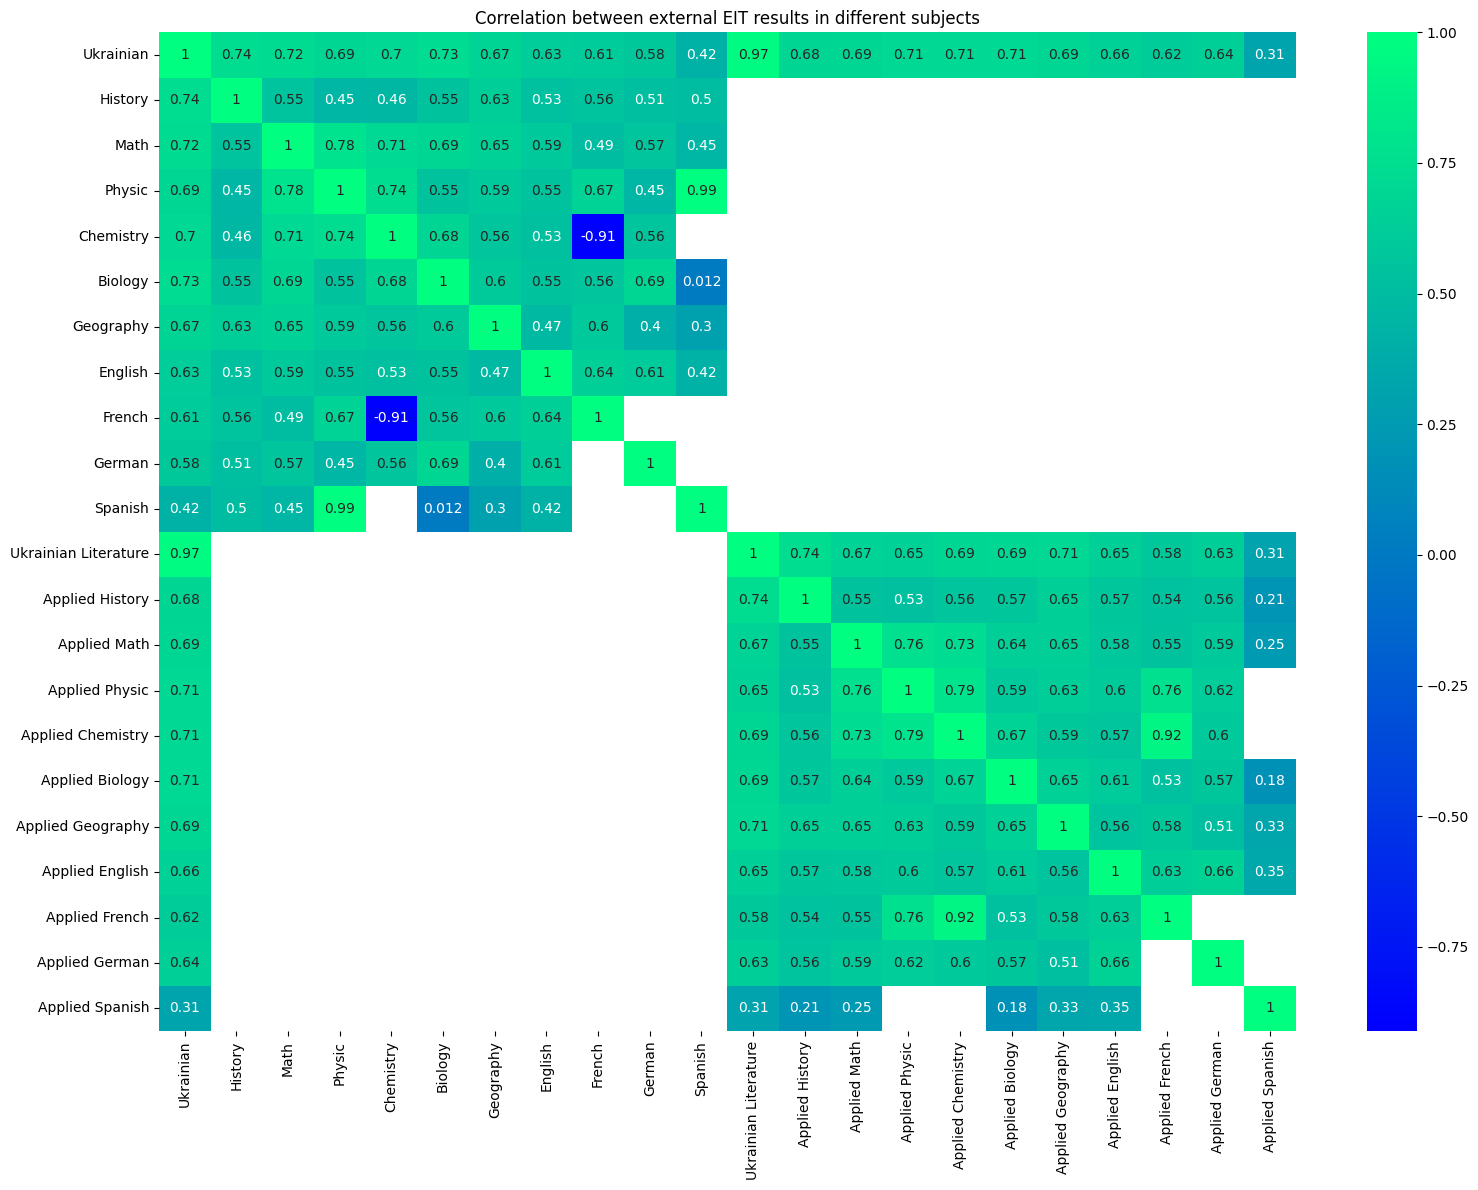

Spanish               Physic                  0.988274
Physic                Spanish                 0.988274
Ukrainian Literature  Ukrainian               0.967723
Ukrainian             Ukrainian Literature    0.967723
Applied Chemistry     Applied French          0.924530
Applied French        Applied Chemistry       0.924530
Applied Physic        Applied Chemistry       0.791609
Applied Chemistry     Applied Physic          0.791609
Math                  Physic                  0.784972
Physic                Math                    0.784972
Applied Physic        Applied Math            0.764824
Applied Math          Applied Physic          0.764824
Applied Physic        Applied French          0.763346
Applied French        Applied Physic          0.763346
Ukrainian             History                 0.739654
History               Ukrainian               0.739654
Chemistry             Physic                  0.739213
Physic                Chemistry               0.739213
Ukrainian 

In [62]:
title_eit = "Correlation between external EIT results in different subjects"
show_matrix(eit_subjects, title_eit)

### NMT

In [63]:
def select_col_nmt(df):
    grades_only = file_processing_NMT.grades_only
    df = df[['OUTID'] + grades_only]
    return df, df[grades_only]

In [64]:
nmt = file_processing_NMT.NMT
nmt, nmt_subjects = select_col_nmt(nmt)

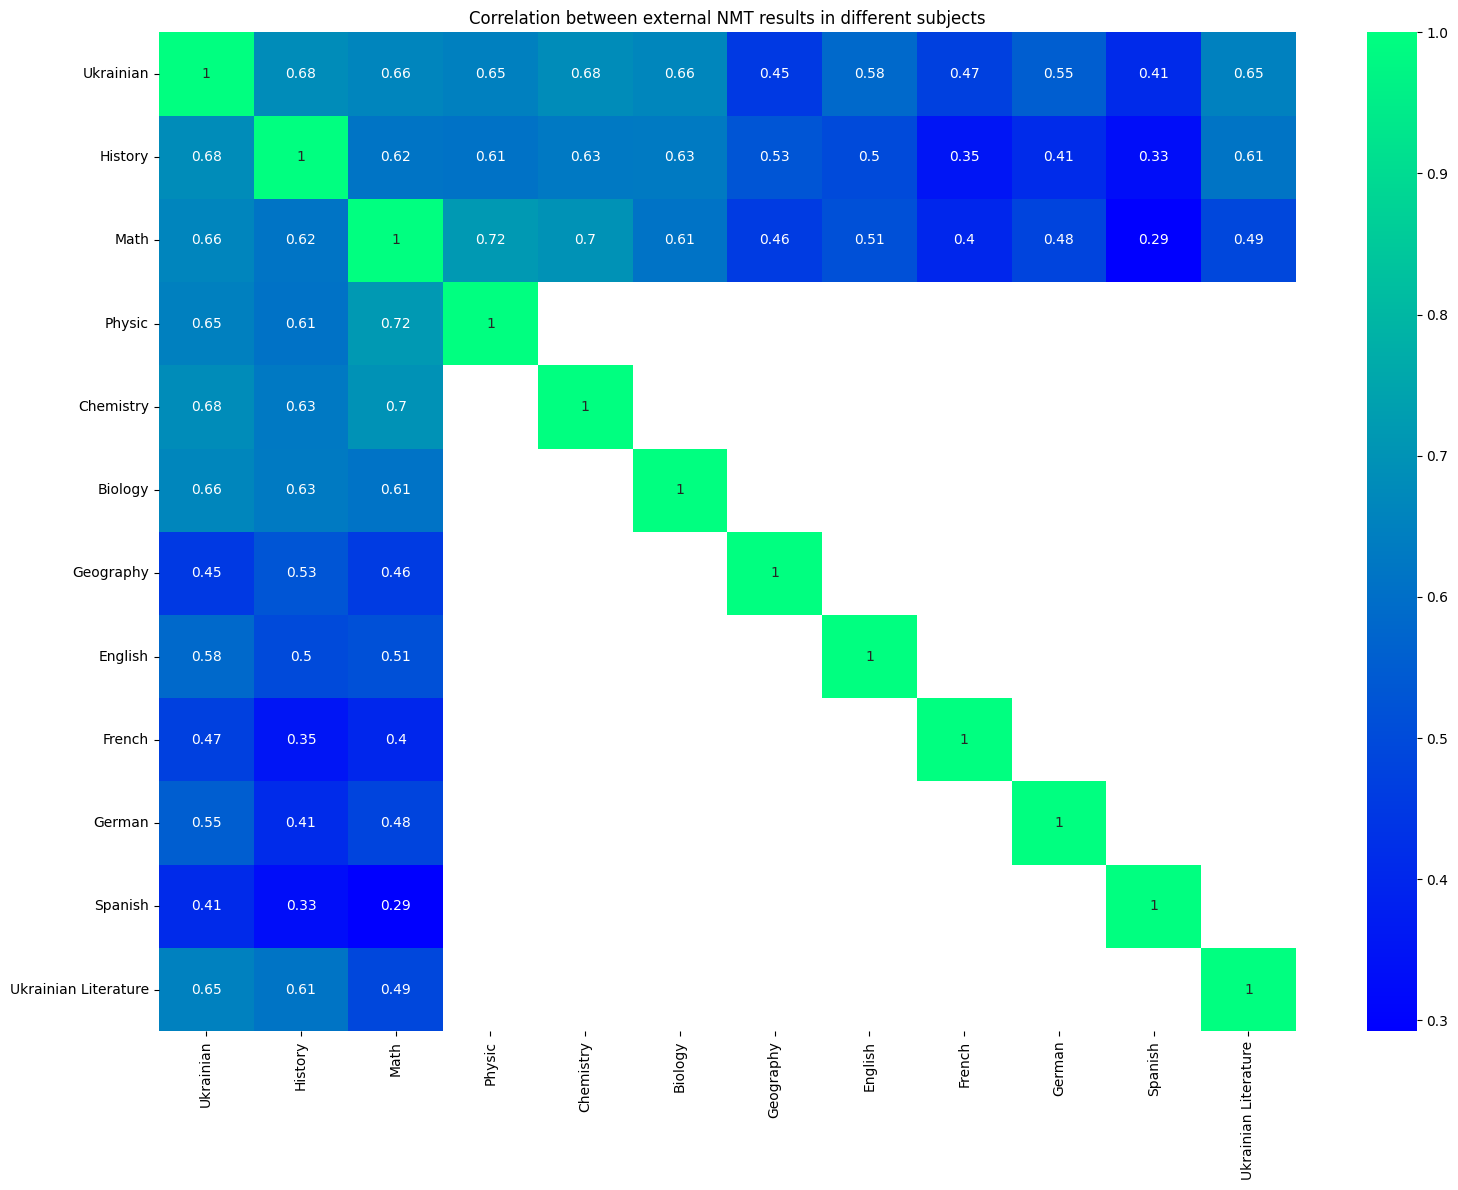

Math    Physic    0.717585
Physic  Math      0.717585
dtype: float64


In [65]:
title_nmt = "Correlation between external NMT results in different subjects"
show_matrix(nmt_subjects, title_nmt)